In [ ]:
pip install tweepy pandas matplotlib seaborn nltk textblob wordcloud


In [ ]:
# Import libraries
import tweepy #Twitter API, It allows to interact programmatically with Twitter to retrieve, post, and analyze tweets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #to indicates frequency or importance of word within a given text dataset
from textblob import TextBlob  #for sentiment analysis
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import tweepy
import pandas as pd
import time

# Twitter API credentials (replace with your actual token)
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAEMnyQEAAAAA1ryxsjQAkTcP%2FdjONcJ9MiyhYbQ%3DauJBAg8Sv5YJWJS3lnRVjnT7tRvJPHMroI3d1xYVicin7xDNGo'

# Authenticate to Twitter using Bearer Token (v2)
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Define a function to fetch tweets using API v2 with error handling for rate limits
def fetch_tweets(query, count=10):
    try:
        # Fetch tweets with the specified query and count
        response = client.search_recent_tweets(query=query, max_results=count)

        # If tweets are found, process and return them as a DataFrame
        if response.data:
            data = [[tweet.text] for tweet in response.data]
            return pd.DataFrame(data, columns=['Tweet'])
        else:
            return pd.DataFrame(columns=['Tweet'])

    except tweepy.TooManyRequests as e:
        # Handle rate limit error (TooManyRequests: 429)
        print("Rate limit exceeded. Waiting for 15 minutes before retrying...")
        time.sleep(900)  # Sleep for 15 minutes (900 seconds)
        return fetch_tweets(query, count)  # Retry the request after waiting

# Fetch tweets for a specific brand or topic
brand = "Adidas"  # Replace with your actual brand or topic
tweets_df = fetch_tweets(brand, count=10)
print(tweets_df.head())



Rate limit exceeded. Waiting for 15 minutes before retrying...
                                               Tweet
0  @MrManhattanKS Adidas must die! https://t.co/5...
1  RT @GorrasCavs: Están listos para hablar de la...
2  RT @pradocrl: Coisas que vão desaparecer da fa...
3  when 21 called me out for wearing levi's and a...
4  RT @_PipeAsprilla_: Oe esos que piden Adidas s...


In [ ]:
import re

# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'@\w+|\#', '', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'[^A-Za-z0-9\s]+', '', tweet)  # Remove special characters
    tweet = tweet.lower()  # Convert to lowercase
    return tweet

tweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(clean_tweet)
print(tweets_df.head())


                                               Tweet  \
0  @MrManhattanKS Adidas must die! https://t.co/5...   
1  RT @GorrasCavs: Están listos para hablar de la...   
2  RT @pradocrl: Coisas que vão desaparecer da fa...   
3  when 21 called me out for wearing levi's and a...   
4  RT @_PipeAsprilla_: Oe esos que piden Adidas s...   

                                       Cleaned_Tweet  
0                                   adidas must die   
1  rt  estn listos para hablar de la nueva lnea d...  
2  rt  coisas que vo desaparecer da face da terra...  
3  when 21 called me out for wearing levis and ad...  
4  rt  oe esos que piden adidas son los mismos qu...  


In [ ]:
tweets_df

,Tweet,Cleaned_Tweet
0,@MrManhattanKS Adidas must die! https://t.co/5...,adidas must die
1,RT @GorrasCavs: Están listos para hablar de la...,rt estn listos para hablar de la nueva lnea d...
2,RT @pradocrl: Coisas que vão desaparecer da fa...,rt coisas que vo desaparecer da face da terra...
3,when 21 called me out for wearing levi's and a...,when 21 called me out for wearing levis and ad...
4,RT @_PipeAsprilla_: Oe esos que piden Adidas s...,rt oe esos que piden adidas son los mismos qu...
5,RT @nokmust: 今話題のadidasストライプデニム、海外で発売予定とのこと。多分...,rt adidas
6,CHINA CHINA CHINA \nI WANT POKEMON TRAINER OUT...,china china china \ni want pokemon trainer out...
7,RT @paxtondom: Did a lace change on my pair of...,rt did a lace change on my pair of adidas lon...
8,RT @desaparecidaorg: José Alfredo Argañaraz Dí...,rt jos alfredo argaaraz daz tiene 17 aos desa...
9,Adidas\nKsh 3500\nSize 40-45\nWhatsapp 0706570...,adidas\nksh 3500\nsize 4045\nwhatsapp 07065704...


In [ ]:
# Function to analyze sentiment
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

tweets_df['Sentiment'] = tweets_df['Cleaned_Tweet'].apply(analyze_sentiment)
print(tweets_df['Sentiment'].value_counts())


Sentiment
Neutral     7
Positive    2
Negative    1
Name: count, dtype: int64


<ipython-input-36-0115cf3ec05f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=tweets_df, palette='viridis')


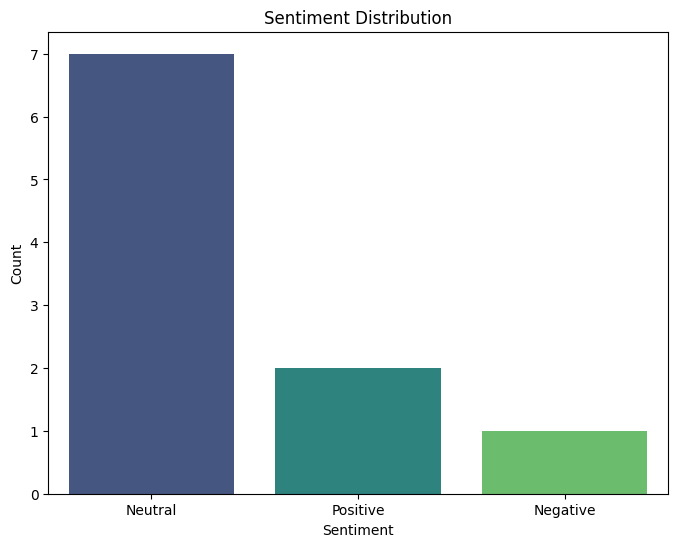

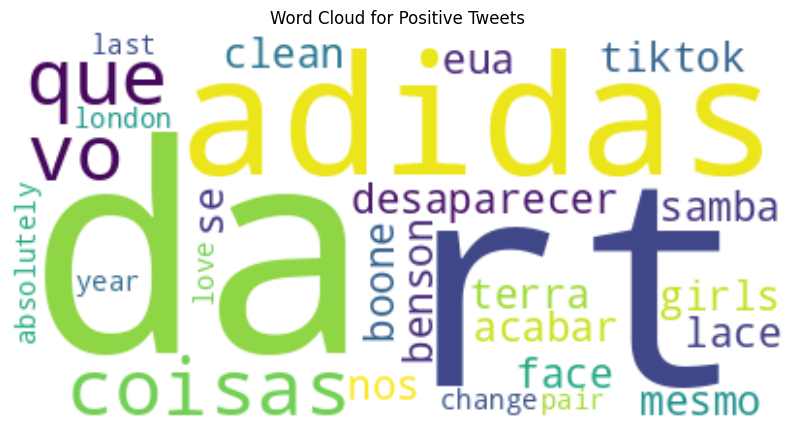

In [ ]:
# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=tweets_df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud for Positive Tweets
positive_tweets = ' '.join(tweets_df[tweets_df['Sentiment'] == 'Positive']['Cleaned_Tweet'])
wordcloud = WordCloud(stopwords=set(stopwords.words('english')), background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()


In [ ]:
tweets_df.to_csv('brand_sentiment_analysis.csv', index=False)
print("Data saved to 'brand_sentiment_analysis.csv'")


Data saved to 'brand_sentiment_analysis.csv'
